# Geochemistry: Custom Dataframe

## Configuration

In [1]:
import sys, os 
sys.path.append("..")

from minalyze import GeochemML

## Getting help

In [2]:
help (GeochemML )

Help on class GeochemML in module minalyze.core:

class GeochemML(Geochem, minalyze.geochem._base.AutomlMixin, minalyze.geochem._base.ClusterPlotMixin)
 |  Custom dataframe for geochem data supporting autoML with PyCaret
 |  
 |  data: pandas.DataFrame
 |      Training data with shape (n_instance, n_features), where n_instance is the number of instances and 
 |      n_features is the number of features.
 |  
 |  unseen: pandas.DataFrame
 |      Test data with shape (n_instance, n_features), where n_instance is the number of instances and 
 |      n_features is the number of features.
 |  
 |  experiment: global variables that can be changed using the ``set_config`` funcion
 |      Global variables configuring the experiment 
 |  
 |  name: str, default = ["kmeans", "kmodes"]
 |      Array of models for training 
 |  
 |  model: scikit-learn compatible object, default = TODO
 |      Trained model object
 |  
 |  active: index of active model (scikit-learn compatible object)
 |      Acti

## Import

Import an unlabeled geochemistry dataset.

In [3]:
filepath   = '../data/OOLDEA2_1m_intervals.csv'
experiment = GeochemML.read_csv( filepath )

## Inspect

Preview the first 5 instances of data  

In [4]:
experiment.head()

,id,result_master_id,DDH_name,from_m,to_m,Sample_Length_m,Scan_Length_m,Scan_Recovery_pct,Comp(c/s),Rayl(c/s),LT(secs),Al_pct,Al_2SE_pct,Al_mdl_pct,Si_pct,Si_2SE_pct,Si_mdl_pct,P_ppm,P_2SE_ppm,P_mdl_ppm,S_pct,S_2SE_pct,S_mdl_pct,Cl_ppm,Cl_2SE_ppm,Cl_mdl_ppm,K_pct,K_2SE_pct,K_mdl_pct,Ca_pct,Ca_2SE_pct,Ca_mdl_pct,Ti_ppm,Ti_2SE_ppm,Ti_mdl_ppm,V_ppm,V_2SE_ppm,V_mdl_ppm,Cr_ppm,Cr_2SE_ppm,Cr_mdl_ppm,Mn_ppm,Mn_2SE_ppm,Mn_mdl_ppm,Fe_pct,Fe_2SE_pct,Fe_mdl_pct,Ni_ppm,Ni_2SE_ppm,Ni_mdl_ppm,Cu_pct,Cu_2SE_pct,Cu_mdl_pct,Zn_pct,Zn_2SE_pct,Zn_mdl_pct,Ga_ppm,Ga_2SE_ppm,Ga_mdl_ppm,As_ppm,As_2SE_ppm,As_mdl_ppm,Se_ppm,Se_2SE_ppm,Se_mdl_ppm,Rb_ppm,Rb_2SE_ppm,Rb_mdl_ppm,Sr_ppm,Sr_2SE_ppm,Sr_mdl_ppm,Y_ppm,Y_2SE_ppm,Y_mdl_ppm,Zr_ppm,Zr_2SE_ppm,Zr_mdl_ppm,Nb_ppm,Nb_2SE_ppm,Nb_mdl_ppm,Mo_ppm,Mo_2SE_ppm,Mo_mdl_ppm,Ba_ppm,Ba_2SE_ppm,Ba_mdl_ppm,La_ppm,La_2SE_ppm,La_mdl_ppm,Ce_ppm,Ce_2SE_ppm,Ce_mdl_ppm,Pb_pct,Pb_2SE_pct,Pb_mdl_pct,U_ppm,U_2SE_ppm,U_mdl_ppm,minaloggerlink
0,69232,38,OOLDEA2,13,14,1,0.2401,24.01,2613.187,715.3073,22.69,2.4882,0.6711,0.8397,22.3157,0.7263,0.2942,0.0,0.0,0.0,0.3293,0.0857,0.0857,0,0,0,2.1815,0.0337,0.0067,1.1516,0.0167,0.0036,4394.9931,77.9360,17.3857,101.98,13.27,10.31,41.43,9.57,13.31,997.5006,24.7826,10.8424,4.6119,0.0128,0.0013,33.92,2.65,2.87,0.0047,0.0006,0.0009,0.0069,0.0004,0.0004,16.84,2.33,3.26,0.0,3.86,5.72,0.0,0.0003,0.0005,110.82,6.34,7.45,183.08,8.34,6.53,17.90,8.74,12.56,246.13,11.49,12.17,0.0,8.85,13.49,0,9.9,14.93,564.78,260.39,75.76,144.19,88.37,35.04,87.31,54.90,40.99,0.0029,0.0017,0.0025,22.97,15.03,20.40,https://minalogger.com/viewer/?project=WESTERN...
1,69233,38,OOLDEA2,14,15,1,0.4056,40.56,2498.827,653.7424,37.04,5.4625,0.6962,0.5558,23.3913,0.6344,0.2257,0.0,0.0,0.0,1.5906,0.2473,0.0677,0,0,0,2.0354,0.0278,0.0057,4.2996,0.0382,0.0031,3972.9395,65.3464,15.5872,97.18,11.19,9.17,61.02,8.89,11.63,1374.6612,29.4294,9.2935,5.9728,0.0127,0.0010,35.88,2.31,2.42,0.0047,0.0005,0.0007,0.0060,0.0003,0.0003,20.55,1.95,2.69,0.0,3.22,4.80,0.0,0.0003,0.0004,101.26,5.26,6.11,186.29,7.73,5.36,25.48,7.69,10.26,241.73,9.88,9.91,0.0,7.27,11.02,0,0.0,0.00,748.25,221.11,69.75,98.25,69.88,31.75,70.23,45.22,36.78,0.0030,0.0014,0.0021,20.18,12.16,16.75,https://minalogger.com/viewer/?project=WESTERN...
2,69234,38,OOLDEA2,15,16,1,0.6329,63.29,2869.263,702.2439,47.39,2.9798,0.5095,0.5622,23.6034,0.5939,0.2036,0.0,0.0,0.0,1.0650,0.1690,0.0604,0,0,0,2.4316,0.0300,0.0048,2.5947,0.0242,0.0026,3402.2079,54.5552,13.1892,87.11,9.43,7.79,43.69,7.46,10.09,948.7098,20.9103,8.5190,5.0235,0.0103,0.0009,37.76,2.14,2.13,0.0066,0.0005,0.0007,0.0052,0.0003,0.0003,22.75,1.76,2.39,0.0,2.73,4.18,0.0,0.0002,0.0004,124.88,5.15,5.35,202.79,7.90,4.71,9.16,6.21,9.04,265.10,9.75,8.75,0.0,6.34,9.53,0,7.1,10.50,496.97,171.95,56.96,88.25,56.43,26.37,113.00,36.45,30.90,0.0032,0.0012,0.0019,31.67,10.89,14.70,https://minalogger.com/viewer/?project=WESTERN...
3,69235,38,OOLDEA2,16,17,1,0.6143,61.43,2594.439,641.5786,48.72,4.0648,0.5209,0.4220,19.1905,0.5057,0.1687,0.0,0.0,0.0,0.0773,0.0377,0.0505,0,0,0,1.8808,0.0243,0.0040,1.1856,0.0132,0.0022,2410.0222,40.7665,10.1916,57.86,7.19,6.26,23.88,5.73,8.09,431.3725,11.6169,6.9701,3.2593,0.0076,0.0008,25.37,1.62,1.66,0.0040,0.0004,0.0005,0.0035,0.0002,0.0002,16.84,1.38,1.91,0.0,0.00,0.00,0.0,0.0002,0.0003,104.59,4.30,4.45,158.59,6.25,3.92,0.00,0.00,0.00,200.86,7.75,7.33,0.0,0.00,0.00,0,6.0,8.82,367.05,136.17,45.81,57.82,45.34,21.19,73.96,29.13,24.85,0.0036,0.0010,0.0015,24.23,9.12,12.22,https://minalogger.com/viewer/?project=WESTERN...
4,69236,38,OOLDEA2,17,18,1,0.4486,44.86,2578.841,647.0553,43.21,3.4820,0.5105,0.4811,15.7049,0.4627,0.1896,0.0,0.0,0.0,0.2257,0.0546,0.0538,0,0,0,2.0808,0.0269,0.0042,0.9481,0.0117,0.0024,1746.3668,33.5724,10.7911,30.69,6.87,6.71,16.87,6.03,8.61,1443.5878,29.4294,6.9701,3.2247,0.0079,0.0008,20.59,1.54,1.78,0.0041,0.0004,0.0005,0.0038,0.0002,0.0003,12.19,1.45,2.04,0.0,0.00,0.00,0.0,0.0002,0.0003,151.94,5.48,4.86,129.75,5.65,4.31,18.43,6.21,8.30,171.48,7.61,8.09,0.0,0.00,0.00,0,6.6,9.94,6

Preview the last 5 instances

In [5]:
experiment.tail()

,id,result_master_id,DDH_name,from_m,to_m,Sample_Length_m,Scan_Length_m,Scan_Recovery_pct,Comp(c/s),Rayl(c/s),LT(secs),Al_pct,Al_2SE_pct,Al_mdl_pct,Si_pct,Si_2SE_pct,Si_mdl_pct,P_ppm,P_2SE_ppm,P_mdl_ppm,S_pct,S_2SE_pct,S_mdl_pct,Cl_ppm,Cl_2SE_ppm,Cl_mdl_ppm,K_pct,K_2SE_pct,K_mdl_pct,Ca_pct,Ca_2SE_pct,Ca_mdl_pct,Ti_ppm,Ti_2SE_ppm,Ti_mdl_ppm,V_ppm,V_2SE_ppm,V_mdl_ppm,Cr_ppm,Cr_2SE_ppm,Cr_mdl_ppm,Mn_ppm,Mn_2SE_ppm,Mn_mdl_ppm,Fe_pct,Fe_2SE_pct,Fe_mdl_pct,Ni_ppm,Ni_2SE_ppm,Ni_mdl_ppm,Cu_pct,Cu_2SE_pct,Cu_mdl_pct,Zn_pct,Zn_2SE_pct,Zn_mdl_pct,Ga_ppm,Ga_2SE_ppm,Ga_mdl_ppm,As_ppm,As_2SE_ppm,As_mdl_ppm,Se_ppm,Se_2SE_ppm,Se_mdl_ppm,Rb_ppm,Rb_2SE_ppm,Rb_mdl_ppm,Sr_ppm,Sr_2SE_ppm,Sr_mdl_ppm,Y_ppm,Y_2SE_ppm,Y_mdl_ppm,Zr_ppm,Zr_2SE_ppm,Zr_mdl_ppm,Nb_ppm,Nb_2SE_ppm,Nb_mdl_ppm,Mo_ppm,Mo_2SE_ppm,Mo_mdl_ppm,Ba_ppm,Ba_2SE_ppm,Ba_mdl_ppm,La_ppm,La_2SE_ppm,La_mdl_ppm,Ce_ppm,Ce_2SE_ppm,Ce_mdl_ppm,Pb_pct,Pb_2SE_pct,Pb_mdl_pct,U_ppm,U_2SE_ppm,U_mdl_ppm,minaloggerlink
151,69383,38,OOLDEA2,164,165,1,0.9415,94.15,1656.487,520.2108,70.32,4.8455,0.5438,0.3522,20.7783,0.4967,0.1446,0.0000,370.5214,509.7397,0.0455,0.0302,0.0429,0,0,0,1.4626,0.0183,0.0037,0.7006,0.0080,0.0020,1944.2044,31.1744,10.1916,25.25,5.75,5.92,35.78,5.65,7.59,4424.4728,78.9946,6.1957,13.2771,0.0180,0.0008,11.70,1.45,1.96,0.0073,0.0004,0.0006,0.0051,0.0002,0.0003,14.08,1.51,2.13,6.44,2.57,3.75,0.0000,0.0002,0.0003,56.37,3.65,4.70,138.87,5.73,4.11,14.53,5.58,7.85,57.29,5.34,7.58,0.0,0.00,0.00,0,5.9,8.94,336.87,103.26,43.87,58.43,33.58,20.11,189.02,22.34,23.80,0.0,0.0011,0.0017,20.35,9.04,12.86,https://minalogger.com/viewer/?project=WESTERN...
152,69384,38,OOLDEA2,165,166,1,0.8726,87.26,1544.148,524.4318,64.57,4.9410,0.5647,0.3738,21.6125,0.5246,0.1531,719.2218,395.8338,534.1793,0.0000,0.0300,0.0454,0,0,0,1.1669,0.0158,0.0039,0.7373,0.0085,0.0021,2099.4770,33.5724,10.7911,27.97,6.07,6.41,39.85,6.10,8.17,4133.2770,74.3479,6.9701,16.9608,0.0225,0.0008,14.35,1.71,2.25,0.0049,0.0005,0.0007,0.0049,0.0003,0.0003,16.09,1.70,2.39,13.35,2.90,4.16,0.0005,0.0002,0.0004,29.42,3.65,5.26,154.25,6.43,4.59,22.11,6.53,8.75,58.36,6.01,8.42,0.0,0.00,0.00,0,6.6,9.87,218.03,102.93,47.18,68.97,35.82,21.69,211.75,23.87,25.67,0.0,0.0000,0.0000,19.08,9.80,14.40,https://minalogger.com/viewer/?project=WESTERN...
153,69385,38,OOLDEA2,166,167,1,0.7751,77.51,1957.022,561.2939,61.08,3.0492,0.4626,0.4643,20.0238,0.5040,0.1675,0.0000,0.0000,0.0000,0.0000,0.0312,0.0455,0,0,0,1.3971,0.0182,0.0040,2.3847,0.0212,0.0022,2527.5257,40.1670,11.3907,18.86,6.39,6.64,35.71,6.18,8.50,2894.9203,53.4375,7.7446,13.5181,0.0192,0.0008,19.31,1.79,2.29,0.0050,0.0005,0.0007,0.0064,0.0003,0.0003,21.31,1.76,2.48,5.95,2.90,4.42,0.0008,0.0003,0.0004,60.78,4.30,5.57,81.12,4.52,4.87,17.59,6.63,9.38,115.12,7.08,9.04,0.0,6.52,10.12,0,0.0,0.00,0.00,0.00,0.00,114.80,41.03,22.64,117.73,25.62,26.52,0.0,0.0013,0.0019,32.09,10.72,15.23,https://minalogger.com/viewer/?project=WESTERN...
154,69386,38,OOLDEA2,167,168,1,0.8018,80.18,1702.285,545.7176,59.02,4.8281,0.5714,0.4070,22.3099,0.5491,0.1624,0.0000,411.5450,570.8387,0.0000,0.0330,0.0473,0,0,0,1.7658,0.0220,0.0041,1.1240,0.0118,0.0023,2199.5949,35.9705,11.3907,31.49,6.55,6.78,34.50,6.33,8.66,2326.4688,43.3696,7.7446,16.1189,0.0220,0.0008,17.68,1.79,2.32,0.0045,0.0005,0.0007,0.0042,0.0003,0.0003,18.04,1.76,2.49,9.65,2.90,4.38,0.0005,0.0003,0.0004,34.25,3.87,5.53,147.30,6.34,4.81,18.64,6.63,9.22,54.76,6.28,8.87,0.0,0.00,0.00,0,6.9,10.38,245.90,112.58,49.86,79.04,38.97,22.96,212.74,25.77,27.18,0.0,0.0013,0.0019,21.36,10.30,15.11,https://minalogger.com/viewer/?project=WESTERN...
155,69387,38,OOLDEA2,168,169,1,0.7051,70.51,1184.426,468.7084,49.69,3.1719,0.5133,0.5217,19.8472,0.5417,0.1944,0.0000,454.3143,648.0852,0.0000,0.0353,0.0529,0,0,0,0.5799,0.0108,0.0045,0.7984,0.0096,0.0024,1946.6025,34.1720,11.9902,19.02,6.55,7.13,51.45,7.01,9.05,2527.0532,47.2419,8.5190,21.3131,0.0285,0.0010,11.45,2.05,2.77,0.0051,0.0006,0.0008,0.0163,0.0005,0.0004,8.92,2.01,2.91,6.27,3.38,5.06,0.0000,0.0003,0.0005,0.00,4.19,6.44,16

List variables. All variables in the dataset including metadata not used in the cluster analysis.

In [6]:
value = experiment.get_variables() 
print( value )

['id', 'result_master_id', 'DDH_name', 'from_m', 'to_m', 'Sample_Length_m', 'Scan_Length_m', 'Scan_Recovery_pct', 'Comp(c/s)', 'Rayl(c/s)', 'LT(secs)', 'Al_pct', 'Al_2SE_pct', 'Al_mdl_pct', 'Si_pct', 'Si_2SE_pct', 'Si_mdl_pct', 'P_ppm', 'P_2SE_ppm', 'P_mdl_ppm', 'S_pct', 'S_2SE_pct', 'S_mdl_pct', 'Cl_ppm', 'Cl_2SE_ppm', 'Cl_mdl_ppm', 'K_pct', 'K_2SE_pct', 'K_mdl_pct', 'Ca_pct', 'Ca_2SE_pct', 'Ca_mdl_pct', 'Ti_ppm', 'Ti_2SE_ppm', 'Ti_mdl_ppm', 'V_ppm', 'V_2SE_ppm', 'V_mdl_ppm', 'Cr_ppm', 'Cr_2SE_ppm', 'Cr_mdl_ppm', 'Mn_ppm', 'Mn_2SE_ppm', 'Mn_mdl_ppm', 'Fe_pct', 'Fe_2SE_pct', 'Fe_mdl_pct', 'Ni_ppm', 'Ni_2SE_ppm', 'Ni_mdl_ppm', 'Cu_pct', 'Cu_2SE_pct', 'Cu_mdl_pct', 'Zn_pct', 'Zn_2SE_pct', 'Zn_mdl_pct', 'Ga_ppm', 'Ga_2SE_ppm', 'Ga_mdl_ppm', 'As_ppm', 'As_2SE_ppm', 'As_mdl_ppm', 'Se_ppm', 'Se_2SE_ppm', 'Se_mdl_ppm', 'Rb_ppm', 'Rb_2SE_ppm', 'Rb_mdl_ppm', 'Sr_ppm', 'Sr_2SE_ppm', 'Sr_mdl_ppm', 'Y_ppm', 'Y_2SE_ppm', 'Y_mdl_ppm', 'Zr_ppm', 'Zr_2SE_ppm', 'Zr_mdl_ppm', 'Nb_ppm', 'Nb_2SE_ppm', 'Nb

List features. These will be the subset of variables used in the cluster analysis. 

In [7]:
value = experiment.get_features()
print( value )

['Cu_pct', 'Cl_ppm', 'Ce_ppm', 'Zn_pct', 'Mn_ppm', 'Ti_ppm', 'Rb_ppm', 'P_ppm', 'Ba_ppm', 'Si_pct', 'V_ppm', 'Ga_ppm', 'Fe_pct', 'Mo_ppm', 'K_pct', 'Y_ppm', 'Se_ppm', 'Ca_pct', 'La_ppm', 'U_ppm', 'Sr_ppm', 'S_pct', 'Ni_ppm', 'Nb_ppm', 'Cr_ppm', 'Zr_ppm', 'Al_pct', 'Pb_pct', 'As_ppm']


List all "ignored" features. These are variables/features not used in clustering, but retained for visualization. 

In [8]:
value = experiment.get_ignorefeatures()
print( value )

['id', 'result_master_id', 'DDH_name', 'from_m', 'to_m', 'Sample_Length_m', 'Scan_Length_m', 'Scan_Recovery_pct', 'Comp(c/s)', 'Rayl(c/s)', 'LT(secs)', 'minaloggerlink', 'Al_mdl_pct', 'Si_mdl_pct', 'P_mdl_ppm', 'S_mdl_pct', 'Cl_mdl_ppm', 'K_mdl_pct', 'Ca_mdl_pct', 'Ti_mdl_ppm', 'V_mdl_ppm', 'Cr_mdl_ppm', 'Mn_mdl_ppm', 'Fe_mdl_pct', 'Ni_mdl_ppm', 'Cu_mdl_pct', 'Zn_mdl_pct', 'Ga_mdl_ppm', 'As_mdl_ppm', 'Se_mdl_ppm', 'Rb_mdl_ppm', 'Sr_mdl_ppm', 'Y_mdl_ppm', 'Zr_mdl_ppm', 'Nb_mdl_ppm', 'Mo_mdl_ppm', 'Ba_mdl_ppm', 'La_mdl_ppm', 'Ce_mdl_ppm', 'Pb_mdl_pct', 'U_mdl_ppm', 'Al_2SE_pct', 'Si_2SE_pct', 'P_2SE_ppm', 'S_2SE_pct', 'Cl_2SE_ppm', 'K_2SE_pct', 'Ca_2SE_pct', 'Ti_2SE_ppm', 'V_2SE_ppm', 'Cr_2SE_ppm', 'Mn_2SE_ppm', 'Fe_2SE_pct', 'Ni_2SE_ppm', 'Cu_2SE_pct', 'Zn_2SE_pct', 'Ga_2SE_ppm', 'As_2SE_ppm', 'Se_2SE_ppm', 'Rb_2SE_ppm', 'Sr_2SE_ppm', 'Y_2SE_ppm', 'Zr_2SE_ppm', 'Nb_2SE_ppm', 'Mo_2SE_ppm', 'Ba_2SE_ppm', 'La_2SE_ppm', 'Ce_2SE_ppm', 'Pb_2SE_pct', 'U_2SE_ppm']


List all features for a specified element

In [9]:
value = experiment.get_element( "Ca" )
print( value )

['Ca_pct', 'Ca_2SE_pct', 'Ca_mdl_pct']


### Visualize

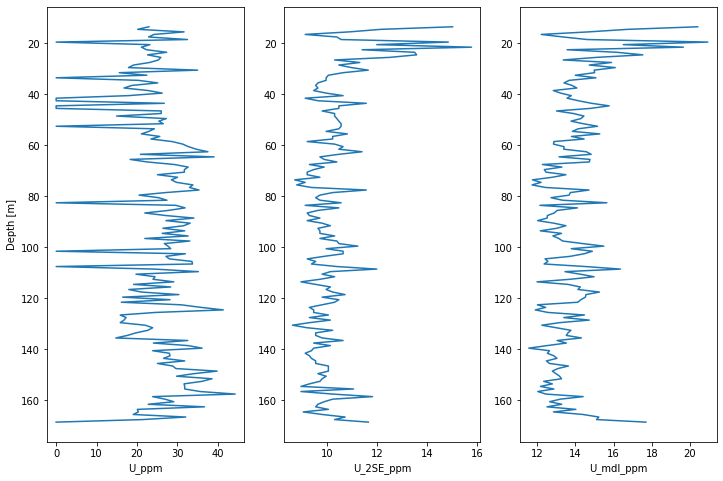

In [10]:
fig = experiment.plot_element( "U" )

## Fit

In [11]:
experiment.prepare()

,Description,Value
0,session_id,123
1,Original Data,"(156, 99)"
2,Missing Values,False
3,Numeric Features,29
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(156, 29)"
9,CPU Jobs,-1


List all available cluster models

In [12]:
value = experiment.get_listmodels()
value

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch
kmodes,K-Modes Clustering,kmodes.kmodes.KModes


In [13]:
experiment.create()

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1775,16.0526,1.865,0,0,0


In [14]:
experiment.label()

In [15]:
experiment.reset()

In [16]:
experiment.run()

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1775,16.0526,1.865,0,0,0


## Evaluate 

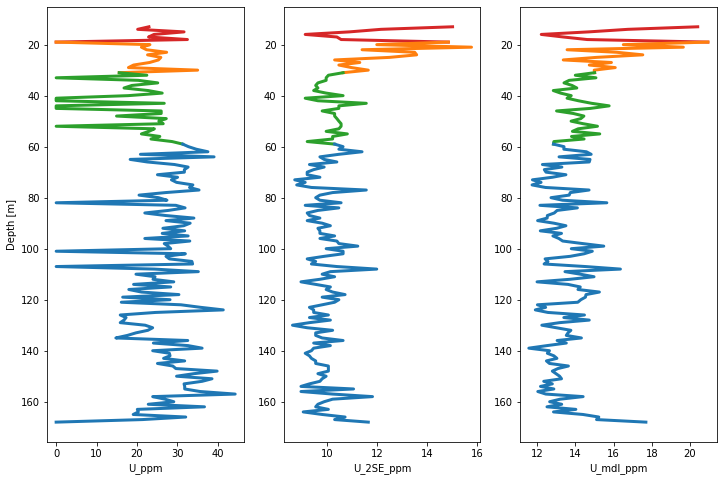

In [18]:
experiment.plot_element( "U", labels=True)

## Properties

In [17]:
experiment.model

[AgglomerativeClustering(affinity='euclidean', compute_full_tree=True,
                         connectivity=<156x156 sparse matrix of type '<class 'numpy.float64'>'
 	with 312 stored elements in Compressed Sparse Row format>,
                         distance_threshold=None, linkage='ward', memory=None,
                         n_clusters=4)]